In [28]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
y = df['Churn'].astype('int')
df.drop(['State', 'Voice mail plan', 'Churn'], axis=1, inplace=True)

In [5]:
df.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,No,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,No,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,Yes,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,Yes,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [6]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})

In [7]:
X = df.values

In [9]:
X.shape, y.shape

((3333, 17), (3333,))

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, 
                                                      shuffle=True, random_state=17)

In [13]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [35]:
tree = DecisionTreeClassifier(max_depth=3, random_state=1)

In [36]:
%%time
tree.fit(X_train, y_train)

Wall time: 10.6 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [37]:
tree_valid_pred = tree.predict(X_valid)

In [38]:
round(float(accuracy_score(y_valid, tree_valid_pred)), 3)

0.905

In [30]:
1 - np.mean(y_valid)

0.867

In [41]:
export_graphviz(tree, out_file='tree.dot', feature_names=df.columns, filled=True)

In [45]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [51]:
tree_params = {'max_depth': range(2, 11),
               'max_features': range(1, 18)}

In [52]:
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_params, cv=skf, verbose=True)

In [53]:
%%time
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 153 candidates, totalling 765 fits
Wall time: 11.1 s


[Parallel(n_jobs=1)]: Done 765 out of 765 | elapsed:   11.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 11), 'max_features': range(1, 18)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [54]:
tree_grid_search.best_params_

{'max_depth': 6, 'max_features': 15}

In [55]:
tree_grid_search.best_score_

0.94170595799399914

In [56]:
tree_grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [57]:
tuned_tree_valid_pred = tree_grid_search.predict(X_valid)

In [59]:
accuracy_score(y_valid, tuned_tree_valid_pred), accuracy_score(y_valid, tree_valid_pred)

(0.94599999999999995, 0.90500000000000003)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=10)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [63]:
knn_valid_pred = knn.predict(X_valid)

In [64]:
accuracy_score(y_valid, knn_valid_pred)

0.88100000000000001

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train)

In [69]:
X_valid_scaled = scaler.transform(X_valid)

In [72]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [73]:
knn_valid_pred_scaled = knn.predict(X_valid_scaled)

In [74]:
accuracy_score(y_valid, knn_valid_pred_scaled)

0.88500000000000001

In [85]:
#knn_params = {'n_neighbors': [1, 2, 5] + list(range(10, 150, 10))}
knn_params = {'n_neighbors': range(3, 11)}

In [86]:
knn_searcher = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf, verbose=True)

In [87]:
knn_searcher.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   11.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(3, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=True)

In [88]:
knn_searcher.best_score_, knn_searcher.best_params_

(0.89027003857693954, {'n_neighbors': 5})

In [89]:
tuned_knn_valid_pred = knn_searcher.predict(X_valid_scaled)
accuracy_score(y_valid, tuned_knn_valid_pred)

0.88900000000000001

In [92]:
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

In [93]:
accuracies_by_k = []

for k in tqdm_notebook(range(1, 11)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    pred = knn.predict(X_valid_scaled)
    accuracies_by_k.append(accuracy_score(y_valid, pred))
    

A Jupyter Widget

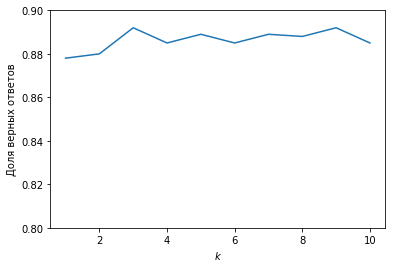

In [102]:
plt.plot(range(1, 11), accuracies_by_k)
plt.xlabel(r'$k$');
plt.ylabel('Доля верных ответов');
plt.ylim(0.8,0.9);

age, salary

dist(x1, x2) = [(age1 - age2) ^ 2 + (salary1 - salary2) ^ 2] ^ 0.5

age <- (age - mean(age)) / std(age)

 